In [1]:
#Download and Load the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [5]:
# Set plot style
sns.set_theme(style="whitegrid")

In [6]:
# Load only the columns we need to save memory
df = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv',usecols=['title', 'abstract', 'publish_time', 'journal'])


In [19]:
#data clleaning and feature engineering
# Drop rows with missing critical data
df.dropna(subset=['title', 'abstract', 'publish_time', 'journal'], inplace=True)
print(df.head())

                                               title  \
0  Clinical features of culture-proven Mycoplasma...   
1  Nitric oxide: a pro-inflammatory mediator in l...   
2    Surfactant protein-D and pulmonary host defense   
3               Role of endothelin-1 in lung disease   
4  Gene expression in epithelial cells in respons...   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

          journal  year  abstract_word_count  
0  BMC Infect Dis  2001                  262  
1      Respir Res  2000                  142  
2      Respir Res  2000                  219  
3      Respir Res  2001                   68  
4      Respir

In [12]:
# Convert publish_time to datetime and extract the year
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df.dropna(subset=['publish_time'], inplace=True)
df['year'] = df['publish_time'].dt.year
df['year'] = df['year'].astype(int)

In [14]:
# Feature Engineering: Create abstract word count
df['abstract_word_count'] = df['abstract'].str.split().str.len()

In [16]:
# Filter out illogical data
df = df[df['year'] <= 2024]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380295 entries, 0 to 1056659
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   title                380295 non-null  object        
 1   abstract             380295 non-null  object        
 2   publish_time         380295 non-null  datetime64[ns]
 3   journal              380295 non-null  object        
 4   year                 380295 non-null  int64         
 5   abstract_word_count  380295 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 20.3+ MB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


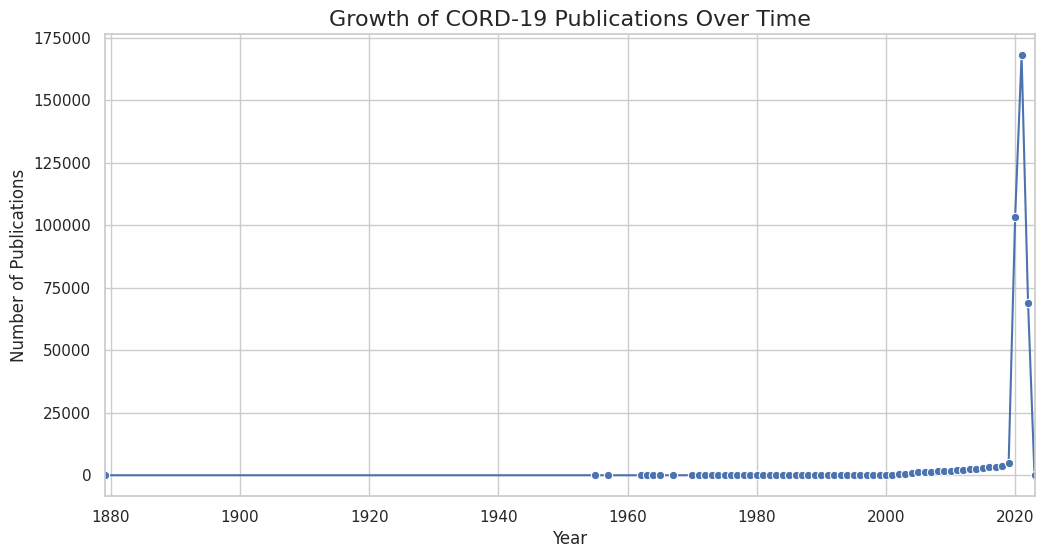

In [18]:
# Visualization - Publications Over Time
plt.figure(figsize=(12, 6))
papers_by_year = df['year'].value_counts().sort_index()
sns.lineplot(x=papers_by_year.index, y=papers_by_year.values, marker='o')
plt.title('Growth of CORD-19 Publications Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xlim(df['year'].min(), df['year'].max())
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


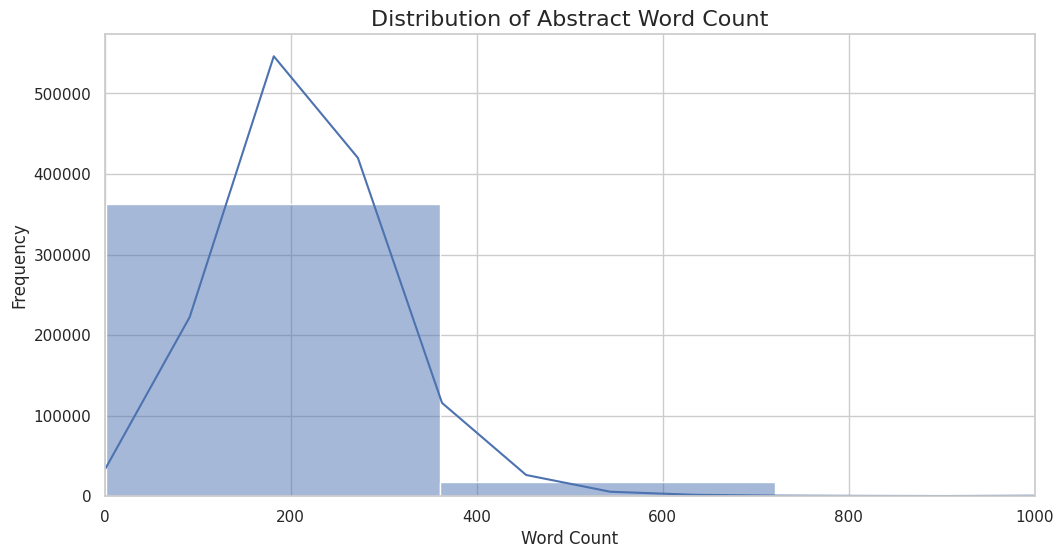

In [22]:
#Visualization - Abstract Length Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['abstract_word_count'], bins=50, kde=True)
plt.title('Distribution of Abstract Word Count', fontsize=16)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 1000) # Focus on the main distribution
plt.show()

In [24]:
#Insightful Word Cloud (with Stop Words removed)
# Combine all titles into one large text block
text = " ".join(title for title in df.title)


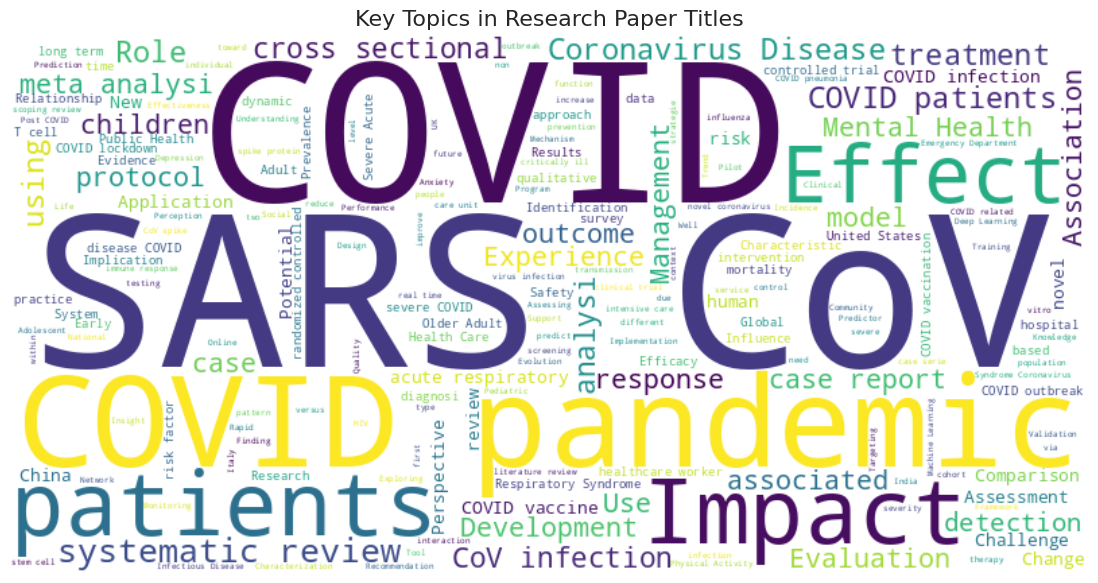

In [27]:
# Remove common English words (stopwords) for a more meaningful cloud
stopwords = set(STOPWORDS)
stopwords.update(["patient", "study", "result", "conclusion", "method", "introduction"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Key Topics in Research Paper Titles', fontsize=16)
plt.show()